# Dự đoán điểm cuối kì của sinh viên dựa trên dữ liệu học thuật và xã hội.

## Bộ dữ liệu
- **Nguồn**: [UCI Student Performance](https://archive.ics.uci.edu/ml/datasets/Student+Performance)
- **Mô tả**: Bộ dữ liệu chứa thông tin về học lực của sinh viên dựa trên các yếu tố học thuật và xã hội. Dữ liệu bao gồm các thuộc tính như điểm số, thời gian học tập, hoàn cảnh gia đình, và các yếu tố xã hội khác. Thông tin chi tiết về bộ dữ liệu có thể được tìm thấy trong liên kết trên.

## Mô hình
Sử dụng thuật toán Random Forest để dự đoán điểm cuối kì (G3) của sinh viên dựa trên các thuộc tính khác trong bộ dữ liệu. Mục tiêu là xây dựng một mô hình có khả năng dự đoán chính xác điểm số cuối kì dựa trên các yếu tố học thuật và xã hội.

In [505]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [506]:
# Load dataset
data = pd.read_csv('data/student-mat.csv', sep=';')
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [507]:
# Data exploration
print('Shape of the dataset:', data.shape)
print('Missing values in each column:')
print(data.isnull().sum())

Shape of the dataset: (395, 33)
Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [508]:
# Feature selection
X = data.drop(columns=['G3'])
y = data['G3']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

print('Categorical features:', categorical_features)
print('Numerical features:', numerical_features)


Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [509]:
# Missing value imputation
numercial_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [510]:
# Hyperparameters Tunning
# Các tham số như max_depth và n_estimators được tìm thấy thông qua vòng lặp và so sánh kết quả tốt nhất.
rf_regressor = RandomForestRegressor(criterion='absolute_error', max_depth=6, n_estimators=300, random_state=42)

In [511]:
# Preprocessing and model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numercial_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_regressor)
])


In [512]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [513]:
# Model training
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [514]:
# Prediction
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nRegression Model Evaluation (test):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")



Regression Model Evaluation (test):
Mean Absolute Error (MAE): 1.1207
Mean Squared Error (MSE): 3.2449
Root Mean Squared Error (RMSE): 1.8014
R-squared (R²): 0.8417


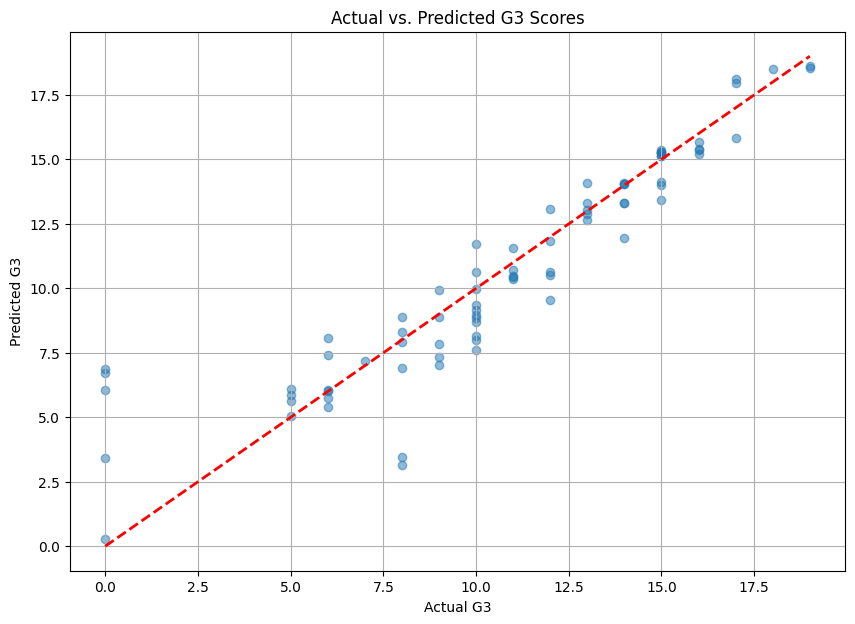

In [515]:
# Actual vs. Predicted Plot
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs. Predicted G3 Scores')
plt.grid(True)
plt.show()


In [516]:
# Feature Importance
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, cat_feature_names])

importances = model.named_steps["regressor"].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)



Feature Importances:
              Feature  Importance
14                 G2    0.773109
12           absences    0.086453
13                 G1    0.016561
6              famrel    0.009193
8               goout    0.007558
11             health    0.007228
36        reason_home    0.006126
0                 age    0.006105
4           studytime    0.005556
10               Walc    0.005231
32         Fjob_other    0.004307
2                Fedu    0.004192
7            freetime    0.003877
43      schoolsup_yes    0.003691
30       Fjob_at_home    0.003262
5            failures    0.003227
29       Mjob_teacher    0.002868
3          traveltime    0.002825
41     guardian_other    0.002573
1                Medu    0.002466
35      reason_course    0.002375
28      Mjob_services    0.002291
42       schoolsup_no    0.002236
9                Dalc    0.002203
33      Fjob_services    0.001876
25       Mjob_at_home    0.001749
37       reason_other    0.001676
57       romantic_yes    0

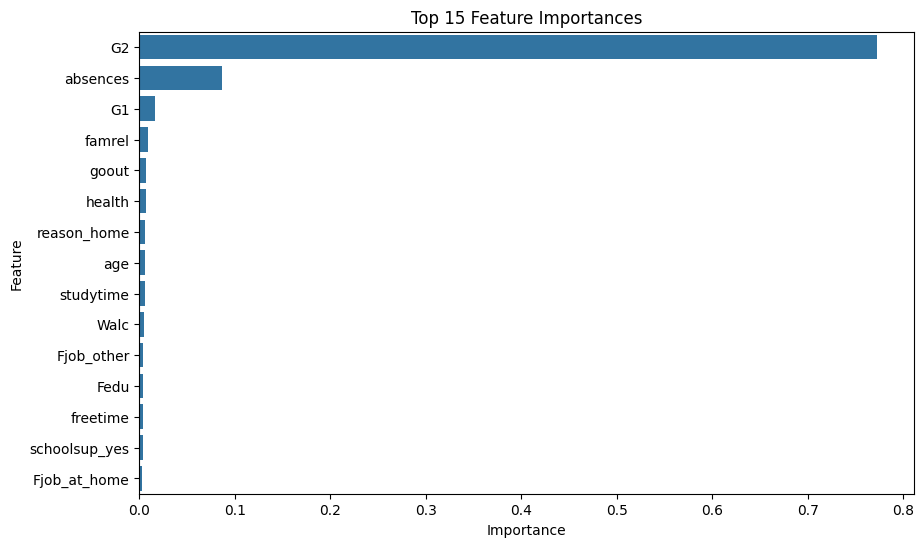

In [517]:
# Top 15 feature importance
top_features = feature_importance_df.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [518]:
# Export the model
import joblib

joblib.dump(model, 'student_performance_regressor.joblib')

print("Model exported to student_performance_regressor.joblib")


Model exported to student_performance_regressor.joblib


---
## So sánh các Setup mô hình khác nhau

Để hiểu rõ hơn về tầm quan trọng của các điểm số kỳ trước (`G1`, `G2`), chúng ta sẽ thử nghiệm và so sánh 3 kịch bản (setup) khác nhau:
- **Setup A**: Sử dụng tất cả các thuộc tính, bao gồm cả `G1` và `G2`.
- **Setup B**: Chỉ sử dụng `G1`, loại bỏ `G2`.
- **Setup C**: Loại bỏ cả `G1` và `G2`.


In [541]:
def train_and_evaluate(data, cols_to_drop):
    """
    Hàm để huấn luyện và đánh giá mô hình với một tập thuộc tính đầu vào nhất định.
    
    Args:
        data (pd.DataFrame): DataFrame chứa toàn bộ dữ liệu.
        cols_to_drop (list): Danh sách các cột cần loại bỏ khỏi tập thuộc tính X (ngoài 'G3').
        
    Returns:
        dict: Một dictionary chứa các chỉ số đánh giá (MAE, MSE, RMSE, R2).
    """
    # 1. Feature selection
    X = data.drop(columns=['G3'] + cols_to_drop)
    y = data['G3']

    # 2. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Identify feature types for the current X
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

    # 4. Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), numerical_features),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_features)
        ]
    )

    # 5. Define the model with the best parameters found
    rf_regressor = RandomForestRegressor(criterion='absolute_error', max_depth=6, n_estimators=300, random_state=42)

    # 6. Create the full pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', rf_regressor)
    ])

    # 7. Train the model
    model_pipeline.fit(X_train, y_train)

    # 8. Predict and evaluate
    y_pred = model_pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Chạy 3 setups
results_A = train_and_evaluate(data, cols_to_drop=[])
results_B = train_and_evaluate(data, cols_to_drop=['G2'])
results_C = train_and_evaluate(data, cols_to_drop=['G1', 'G2'])


### Bảng tổng kết kết quả
Dưới đây là bảng so sánh hiệu suất của 3 setup.


In [542]:
# Tạo DataFrame để so sánh
comparison_df = pd.DataFrame({
    'Setup A (G1, G2)': results_A,
    'Setup B (chỉ G1)': results_B,
    'Setup C (không G1, G2)': results_C
}).T # Transpose để các setup thành hàng

# Định dạng lại số cho dễ đọc
comparison_df = comparison_df.map('{:.4f}'.format)

print("--- BẢNG SO SÁNH CÁC SETUP ---")
print(comparison_df)


--- BẢNG SO SÁNH CÁC SETUP ---
                           MAE      MSE    RMSE      R2
Setup A (G1, G2)        1.1207   3.2449  1.8014  0.8417
Setup B (chỉ G1)        1.7668   6.4134  2.5325  0.6872
Setup C (không G1, G2)  3.1693  15.9533  3.9942  0.2220
